# Individual Project Planning Stage Report
### by Ambrose Gogiberidze

In [1]:
library(tidyverse)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <- read_csv("players.csv") 


glimpse(players)
dim(players)
colSums(is.na(players))
summary(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


[1] 196   7

experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

This data uses the dataset "players.csv" which contains a variety of information about players, such as age, gender, experience in video games, amount of hours played (for the surveying done to collect data), as well as whether they are subscribed to a game-related newsletter or not.

### Questions: **What kinds of players are most likely to subscribe to a game-related newsletter based on their gaming history?**
#### ***Can the surveyed players' tracked amount of time spent playing videogames predict whether they would be subscribed to a game-related newsletter based on our given data?***

The question specifically begs the information that was surveyed for this dataset, as in, is there any correlation between a person's age, gender, and amount of time spent playing video games and whether or not they'd be likely to be subscribed to a game-related newsletter. Can these pieces of information predict newsletter subscription in the players.csv dataset?

The response variable "subscribe" indicates whether a player is subscribed to a newsletter (TRUE = yes, FALSE = no), while predictors include the age, gender, experience and played_hours variables. Before modeling anything in the data, categorical variables will be encoded as factors, and numeric variables will be checked for any outliers or missing points. Then, a KNN classification model will be performed to predict the variable "subscribe".I believe that the dataset is tidy as it is given, but the variables "name" and "hashedEmail" are unnecessary for this classification model, as they are irrelevant for prediction and for this analysis.

In [3]:
player_means <- players |>
summarize(mean_age = round(mean(Age, na.rm = TRUE), 2), mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2))

player_means

mean_age,mean_played_hours
<dbl>,<dbl>
21.14,5.85


According to the mean calculation, the average player within this dataset is approximately **21 years old** and played for an average **5.85 hours** in total.

# Visualizations of the data

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


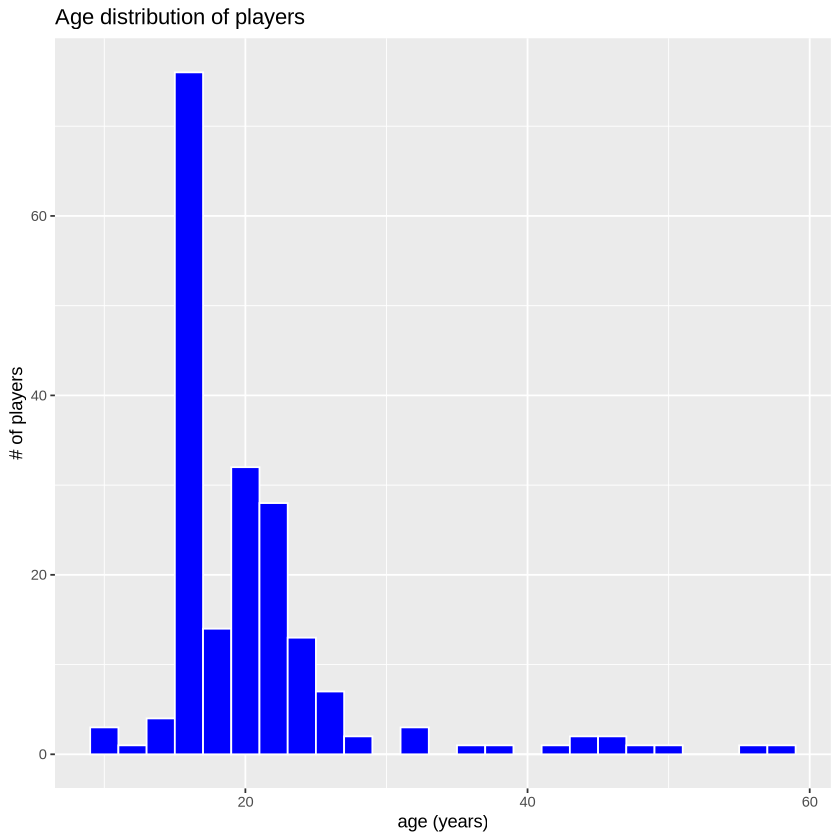

In [4]:
ggplot(players, aes(x = Age)) +
geom_histogram(binwidth = 2, fill = "blue", color = "white") +
labs(
    title = "Age distribution of players",
    x = "age (years)",
    y = "# of players")

According to this histogram graph, most of the surveyed players are young adults.

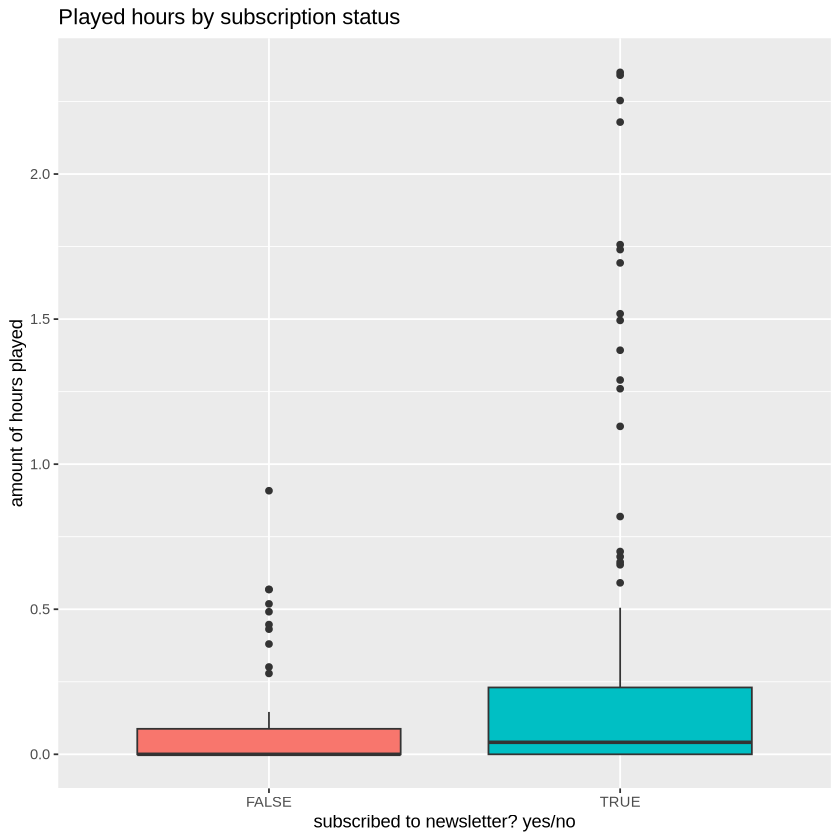

In [5]:
ggplot(players, aes(x = subscribe, y = log10(played_hours + 1), fill = subscribe)) + # this is to scale played_hours as the dataset is very skewed otherwise
geom_boxplot() +
labs(
    title = "Played hours by subscription status",
    x = "subscribed to newsletter? yes/no",
    y = "amount of hours played") +
theme(legend.position = "none")

According to this, players who have subscriptions to newsletters pay more on average, indicating that played_hours might be able to predict subscribe.

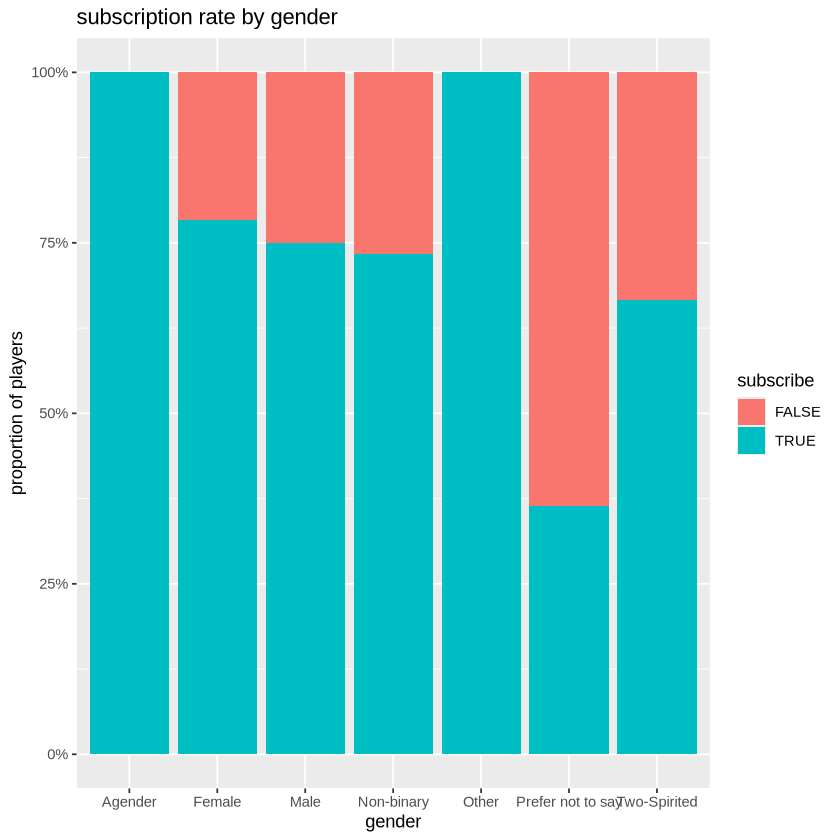

In [6]:
ggplot(players, aes(x = gender, fill = subscribe)) +
geom_bar(position = "fill") +
labs(
    title = "subscription rate by gender",
    x = "gender",
    y = "proportion of players") +
scale_y_continuous(labels = scales::percent)

We can see here that gender does not have much effect on subscription rates.

### Overall, based on these observations:
- The age group of the players is mostly around 20 (young adults).
- "played_hours" is very skewed.
- subscribers are likely to have more amount of hours played than non subscribers.
- gender does not really impact subscribing status, hence will not be used as a predictor variable.

## Future planning and methods

The intended method for this project is to use a K-NN classification model to predict variable "subscribe" based on variables "Age", "experience" and "played_hours", as based on earlier observations, these variables would be likely to help predict "subscribe". K-NN suits a binary outcome, as it classifies based on similarity without necessarily assuming a pre-existing relationship between data. For assumptions, we have to make sure that the predictors are scaled so that all variables contribute equally to the prediction. There might be some limitations, like our choice for k, or some outliers. It is noteable to make sure we get enough information to decide a correct or accurate k choice and try to do analyses the best way we can. We'll use 5-fold cross-validation to find a k with the best accuracy and then use that to do the predictions; as well as standardizing the predictors, encoding factors, and splitting data (75% training, 25% testing) with a fixed seed.